# 📊 Exploratory Data Analysis

## 💾 Loading Data

In [190]:
# Displaying full output in Jupyter, not only the last result:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd


# Load the dataset into a pandas DataFrame
df = pd.read_csv("chatgpt_articles.csv")
df.head()


,Title,Link,Snippet,Citations,Puplication Information
0,ChatGPT and the Rise of Large Language Models:...,https://papers.ssrn.com/sol3/papers.cfm?abstra...,… a product generated by ChatGPT would be … Ch...,Save Cite Cited by 8,"L De Angelis, F Baglivo, G Arzilli… - Availabl..."
1,ChatGPT-Reshaping medical education and clinic...,https://www.pjms.org.pk/index.php/pjms/article...,… ChatGPT is the most widely known of the list...,Save Cite Cited by 4 All 6 versions View as H...,"RA Khan, M Jawaid, AR Khan, M Sajjad - Pakista..."
2,Collaborating With ChatGPT: Considering the Im...,https://journals.sagepub.com/doi/abs/10.1177/1...,… platform called ChatGPT made available to th...,Save Cite Cited by 37 Related articles,JV Pavlik - Journalism & Mass Communication Ed...
3,A prompt pattern catalog to enhance prompt eng...,https://arxiv.org/abs/2302.11382,… prompts were tested with ChatGPT [12] using ...,Save Cite Cited by 4 All 3 versions View as H...,"J White, Q Fu, S Hays, M Sandborn, C Olea… - a..."
4,Exploring the limits of chatgpt for query or a...,https://arxiv.org/abs/2302.08081,… ChatGPT-generated summaries and human refere...,Save Cite Cited by 4 All 2 versions View as H...,"X Yang, Y Li, X Zhang, H Chen, W Cheng - arXiv..."


In [191]:
print("Getting a sense of the dataset:")
df.info()
df.describe()

# get the original number of articles
original_count = len(df)

# drop duplicates based on the 'Title' column and keep the first occurrence
df.drop_duplicates(subset=['Title'], keep='first', inplace=True)

# get the number of articles after removing duplicates
new_count = len(df)


# print the original and new article counts
print(f'Original number of articles: {original_count}')
print("\n")
print(f'Number of articles after removing duplicates: {new_count}')

Getting a sense of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    925 non-null    object
 1   Link                     864 non-null    object
 2   Snippet                  778 non-null    object
 3   Citations                925 non-null    object
 4   Puplication Information  925 non-null    object
dtypes: object(5)
memory usage: 36.3+ KB


,Title,Link,Snippet,Citations,Puplication Information
count,925,864,778,925,925
unique,925,781,767,213,609
top,ChatGPT and the Rise of Large Language Models:...,https://link.springer.com/article/10.1007/s121...,"… Recently, academics have been amazed by the ...",Save Cite,I Boughzala - 2023 - ideas.repec.org
freq,1,28,5,90,312


Original number of articles: 925


Number of articles after removing duplicates: 925


## 🧹 Data Preprocessing

#### Some titles start with [HTML][HTML] or [PDF][PDF] ... So we got rid of them using regex.

In [192]:
import re

df['Title'] = df['Title'].str.replace(r'^\s*\[[^]]*\]\s*', '', regex=True)

df.to_csv("chatgpt_articles.csv")

In [193]:
df["Title"] = df["Title"].astype(str)
df["Snippet"] = df["Snippet"].astype(str)

titles = df['Title'].to_list()
snippets = df['Snippet'].to_list()

print("The first article title in the dataset📝:\n",titles[0])
print("\n")
print("Its snippet✍🏼:\n",snippets[0])

The first article title in the dataset📝:
 ChatGPT and the Rise of Large Language Models: The New AI-Driven Infodemic Threat in Public Health


Its snippet✍🏼:
 … a product generated by ChatGPT would be … ChatGPT and speculate about its future impact 
on research and public health. The objective of this paper is to promote a debate on ChatGPT’…


In [194]:
import re
import string
from langdetect import detect #to get rid of non-english titles
from collections import Counter #for word frquency analysis

#cleaning data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import words #we can also use words.words() method to get rid of non-english articles
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess


print("Succesfully imported all required libraries.")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samaneh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /Users/samaneh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package words to /Users/samaneh/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Succesfully imported all required libraries.


In [195]:
# perform preprocessing and data cleaning on the article titles and snippets

stop_words = stopwords.words('english')
custom_stop_words = ['chatgpt', 'html']
stop_words = stop_words + custom_stop_words
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english') #we decided not to use it
 
    
def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')


def preprocess(text):
    # text = re.sub('^\[.*?\]\s*', '', text) #remove [...][...] from the beginning of titiles
    text = text.replace('\n', '') #remove \n from snippets
    text = text.replace('\r', '') #remove \r from snippets
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()  # convert to lowercase
    tokens = text.split()
    
    result = []
    for token in simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            # result.append(lemmatize_stemming(token))
            result.append(lemmatize(token))
            
    return result


english_titles = [title for title in titles if detect(title)=='en']
english_snippets = [snippet for snippet in snippets if detect(snippet)=='en']

cleaned_titles = [preprocess(title) for title in english_titles]
cleaned_snippets = [preprocess(snippet) for snippet in english_snippets]

print('Number of All Papers in the dataset:', len(titles))
print("\n")
print("Number of Non-English Papers:", len(english_titles))
print("\n")
print("First Article Title in the Dataset:",titles[0])
print("\n")
print("Cleaned Version:",cleaned_titles[0])
print("\n")
print("First Article Snippet in the Dataset:",snippets[0])
print("\n")
print("Cleaned Version:",cleaned_snippets[0])

Number of All Papers in the dataset: 925


Number of Non-English Papers: 821


First Article Title in the Dataset: ChatGPT and the Rise of Large Language Models: The New AI-Driven Infodemic Threat in Public Health


Cleaned Version: ['rise', 'large', 'language', 'model', 'aidriven', 'infodemic', 'threat', 'public', 'health']


First Article Snippet in the Dataset: … a product generated by ChatGPT would be … ChatGPT and speculate about its future impact 
on research and public health. The objective of this paper is to promote a debate on ChatGPT’…


Cleaned Version: ['product', 'generate', 'would', 'speculate', 'future', 'impact', 'research', 'public', 'health', 'objective', 'paper', 'promote', 'debate']


## 🔍 Word-Frequency Analysis

In [196]:
from collections import Counter


# Combine all cleaned texts (titles and snippets) into a single list
cleaned_text = []
for title in cleaned_titles:
    cleaned_text += title
for snippet in cleaned_snippets:
    cleaned_text += snippet

# Count the frequency of each word in the cleaned text
word_counts = Counter(cleaned_text)

# Calculate the total number of words
total_words = sum(word_counts.values())


print("The top 20 most frequent words with their frequency and percentage:")

for word, count in word_counts.most_common(20):
    frequency = count / total_words
    percentage = frequency * 100
    print(f"{word}: {count} ({percentage:.2f}%)")



The top 20 most frequent words with their frequency and percentage:
use: 209 (1.48%)
model: 201 (1.43%)
language: 167 (1.19%)
write: 161 (1.14%)
artificial: 147 (1.04%)
intelligence: 133 (0.94%)
generate: 104 (0.74%)
research: 104 (0.74%)
study: 104 (0.74%)
education: 101 (0.72%)
large: 100 (0.71%)
tool: 95 (0.67%)
chatgpts: 86 (0.61%)
chat: 82 (0.58%)
potential: 80 (0.57%)
paper: 80 (0.57%)
question: 80 (0.57%)
generative: 79 (0.56%)
chatbot: 74 (0.53%)
openai: 73 (0.52%)


### 📊 Visulization

In [197]:
# Import required libraries
from lets_plot import *
LetsPlot.setup_html()

# Convert word counts to pandas DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df = word_counts_df.reset_index().rename(columns={'index':'word'})
# word_counts_df

# Sort by frequency and get the top 20 words
top_20_words = word_counts_df.sort_values('count', ascending=False).head(20)

# Create bar chart using Lets-Plot:
# Create a plot object and customize it
p = ggplot(top_20_words, aes(x='word', y='count', fill='count')) + \
    geom_bar(stat='identity') + \
    ggtitle('Top 20 Most Frequent Words') + \
    xlab('Words') + \
    ylab('Frequency') + \
    theme(plot_title=element_text(size=20, hjust=0.5), 
          axis_text_x=element_text(size=15,angle=90, hjust=1))


# Show the plot
p.show()


<Figure size 1200x600 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

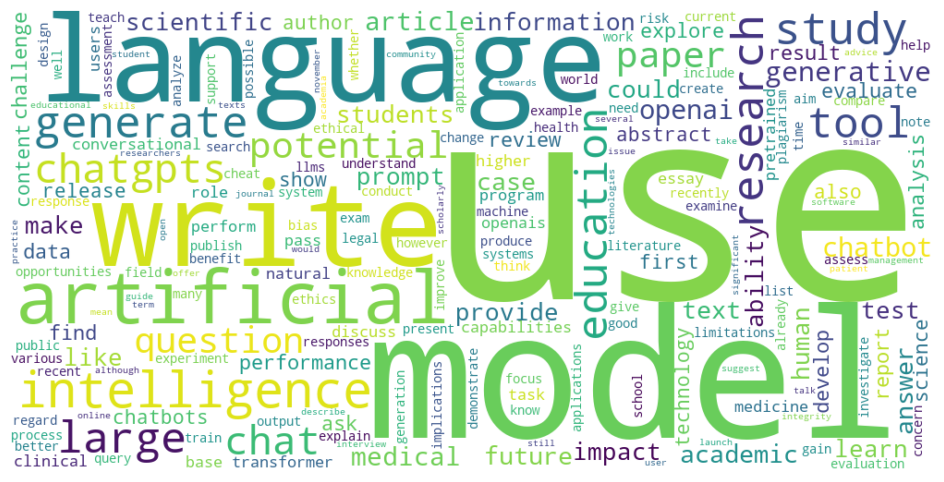

In [198]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Create a word cloud from the word counts
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_counts)


# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<Figure size 1200x600 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

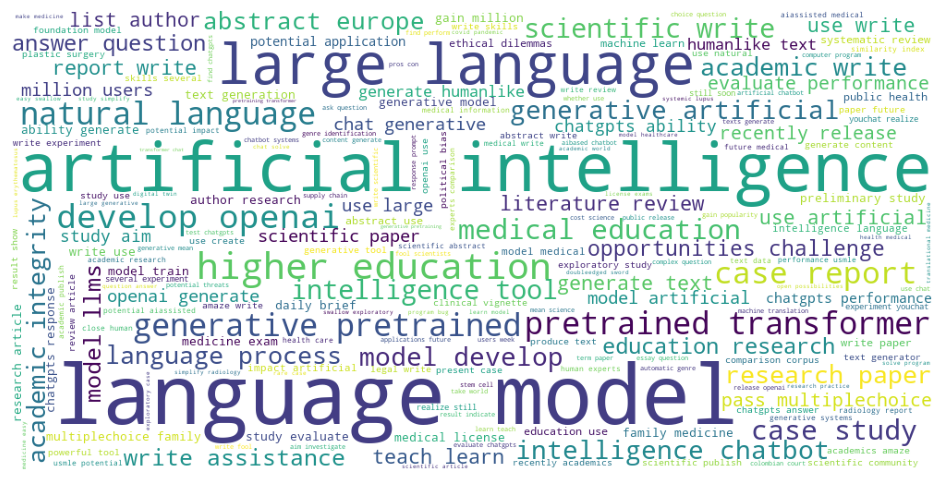

In [199]:
# Create a word cloud from the combined titles (cleaned_text)
text = ' '.join(cleaned_text)

word_cloud = WordCloud(collocation_threshold=3, width=1000,height=500,
                      background_color='white').generate(text)


# display the generated word_cloud
plt.figure(figsize=(12,6))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## 🔢 Citation Analysis

In [200]:
# define a function to extract the citation count
def citation_count(citation_text):
    citation_count = re.search(r"Cited by (\d+)", citation_text)
    if citation_count:
        return int(citation_count.group(1))
    else:
        return 0

# apply the citation_count function to the 'Citation' column and create a new column 'Citation_Count'
df['Citation_Count'] = df['Citations'].apply(citation_count)
df.head(5)


,Title,Link,Snippet,Citations,Puplication Information,Citation_Count
0,ChatGPT and the Rise of Large Language Models:...,https://papers.ssrn.com/sol3/papers.cfm?abstra...,… a product generated by ChatGPT would be … Ch...,Save Cite Cited by 8,"L De Angelis, F Baglivo, G Arzilli… - Availabl...",8
1,ChatGPT-Reshaping medical education and clinic...,https://www.pjms.org.pk/index.php/pjms/article...,… ChatGPT is the most widely known of the list...,Save Cite Cited by 4 All 6 versions View as H...,"RA Khan, M Jawaid, AR Khan, M Sajjad - Pakista...",4
2,Collaborating With ChatGPT: Considering the Im...,https://journals.sagepub.com/doi/abs/10.1177/1...,… platform called ChatGPT made available to th...,Save Cite Cited by 37 Related articles,JV Pavlik - Journalism & Mass Communication Ed...,37
3,A prompt pattern catalog to enhance prompt eng...,https://arxiv.org/abs/2302.11382,… prompts were tested with ChatGPT [12] using ...,Save Cite Cited by 4 All 3 versions View as H...,"J White, Q Fu, S Hays, M Sandborn, C Olea… - a...",4
4,Exploring the limits of chatgpt for query or a...,https://arxiv.org/abs/2302.08081,… ChatGPT-generated summaries and human refere...,Save Cite Cited by 4 All 2 versions View as H...,"X Yang, Y Li, X Zhang, H Chen, W Cheng - arXiv...",4


In [201]:
df['Citation_Count'] = df['Citation_Count'].astype(int)

# Group the data by paper and sum the citation counts
citations = df.groupby(['Title']).agg({'Citation_Count': 'sum'})

# Sort the resulting dataframe by citation count to identify the most highly cited papers
top_citations = citations.sort_values('Citation_Count', ascending=False).head(10)

print("Top 10 Cited Papers:\n",top_citations)


Top 10 Cited Papers:
                                                     Citation_Count
Title                                                             
Performance of ChatGPT on USMLE: Potential for ...              87
ChatGPT is fun, but not an author                               80
ChatGPT: five priorities for research                           68
ChatGPT listed as author on research papers: ma...              67
AI bot ChatGPT writes smart essays-should acade...              51
OpenAI ChatGPT generated literature review: Dig...              46
Comparing scientific abstracts generated by Cha...              37
Collaborating With ChatGPT: Considering the Imp...              37
ChatGPT and other large language models are dou...              36
ChatGPT user experience: Implications for educa...              32


In [202]:
top_cited_papers = df.sort_values('Citation_Count', ascending=False).head(10)

print("Top Cited Papers:\n")
for index, paper in top_cited_papers.iterrows():
    print("Paper title:", paper['Title'])
    print("Snippet:", paper['Snippet'])
    print("Publication Information:", paper['Puplication Information'])
    print("Citation count:", paper['Citation_Count'])
    print("--------------------")


Top Cited Papers:

Paper title: Performance of ChatGPT on USMLE: Potential for AI-assisted medical education using large language models
Snippet: … To accomplish this, we evaluated the performance of ChatGPT, a … We found that ChatGPT 
performed at or near the passing … Impressively, ChatGPT was able to achieve this result …
Publication Information: TH Kung, M Cheatham, A Medenilla, C Sillos… - PLoS digital …, 2023 - journals.plos.org
Citation count: 87
--------------------
Paper title: ChatGPT is fun, but not an author
Snippet: … of ChatGPT on writing scientific papers. In a recent study, abstracts created by ChatGPT were 
… And no, although surely ChatGPT could write a better manuscript than I will, ChatGPT is for …
Publication Information: HH Thorp - Science, 2023 - science.org
Citation count: 80
--------------------
Paper title: ChatGPT: five priorities for research
Snippet: … A smartphone with the AI ChatGPT service down notification, and a laptop screen with 
ChatGPT home page de

### 📊 Visulization

<BarContainer object of 10 artists>

Text(0.5, 0, 'Number of Citations')

Text(0, 0.5, 'Title')

Text(0.5, 1.0, 'Top 10 Cited Papers')

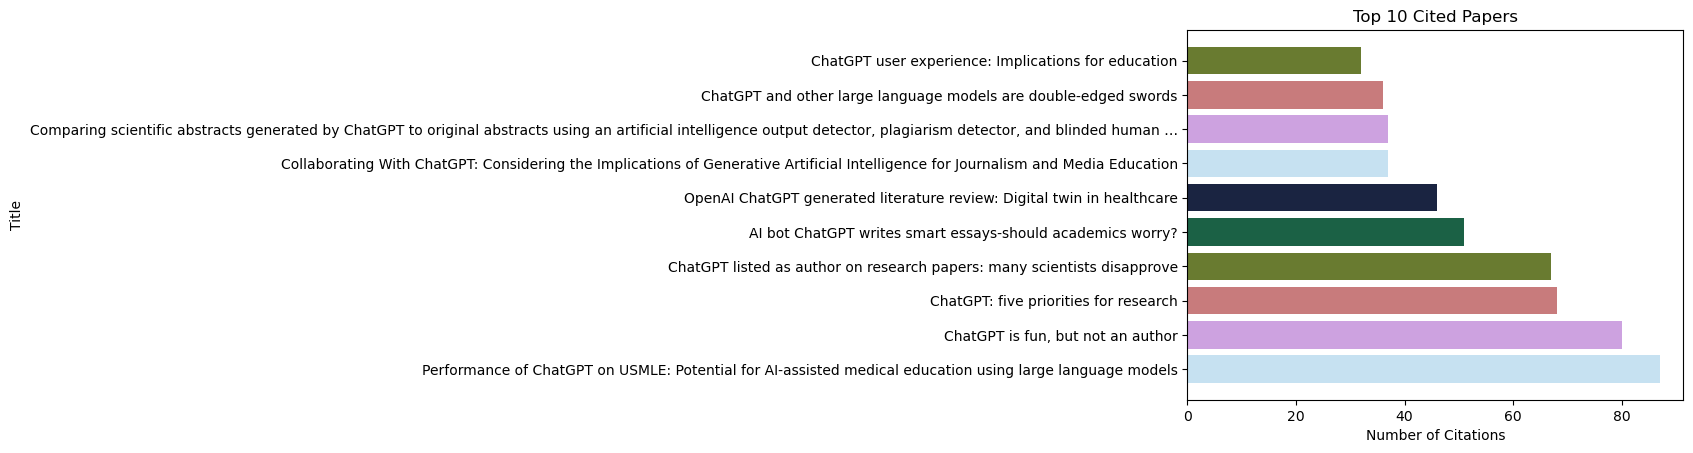

In [203]:
import seaborn as sns

top_citations = df.sort_values(by='Citation_Count', ascending=False).head(10)

palette = sns.color_palette("cubehelix_r")

# Create a bar plot of the top 10 cited papers
plt.barh(y=top_citations['Title'], width=top_citations['Citation_Count'], color = palette)
plt.xlabel('Number of Citations')
plt.ylabel('Title')
plt.title('Top 10 Cited Papers')
plt.show()

## 📈 Publication Trends

#### Publication by Year 

In [204]:
# Extract the year from the 'Publication Information' column using regular expressions
df['Year'] = df['Puplication Information'].str.extract(r'(\b202[23]\b)')

# Count the number of papers published in each year
year_counts = df['Year'].value_counts()

# Print the results
print("Year:   Number of Papers:")
print(year_counts)

Year:   Number of Papers:
2023    809
2022     61
Name: Year, dtype: int64


In [205]:
# Create a histogram to visualize the distribution of publications across different years
ggplot(df, aes(x='Year',fill='Year')) + \
    geom_histogram(binwidth=1, alpha=0.5) + \
    labs(x='Year', y='Number of Publications', title='Publication Trends over Time') + \
    theme(plot_title=element_text(size=20, hjust=0.5), panel_grid_major = element_blank()) + \
    ggsize(800, 400)


<Figure size 500x500 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f8290bfadf0>,
 [Text(-0.24034528991425894, -1.073421697943558, '2023'),
  Text(0.2403453904152505, 1.0734216754408032, '2022')],
 [Text(-0.13109743086232303, -0.5855027443328498, '93.0%'),
  Text(0.1310974856810457, 0.5855027320586198, '7.0%')])

Text(0.5, 1.0, 'Distribution of Papers Published in 2022 and 2023')

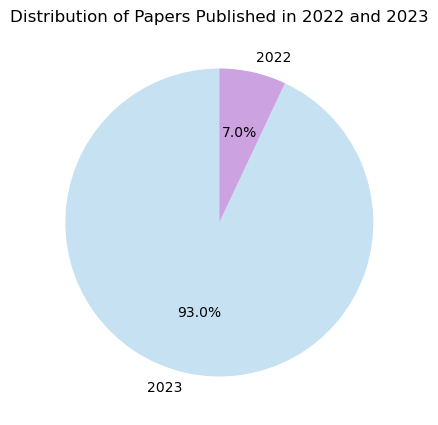

In [206]:
import matplotlib.pyplot as plt


palette = sns.color_palette("cubehelix_r")


# create a pie chart
plt.figure(figsize=(5,5))
plt.pie(year_counts, labels=['2023', '2022'], colors=palette, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Papers Published in 2022 and 2023')
plt.show()


#### Publication by Research Netwroks/Science Databases

In [214]:
# Define regular expression pattern to capture only the second-level domain name (without any subdomain)
pattern = r'(?:https?:\/\/)?(?:www\.)?([a-zA-Z0-9.-]+\.[a-zA-Z]{2,})'

# Extract domain name using regular expression
df['Website'] = df['Link'].str.extract(pattern, expand=False)

# Extract top journals
journal_counts = df['Website'].value_counts()
top_journals = journal_counts.head(10)
print(top_journals)

arxiv.org                 104
papers.ssrn.com            97
link.springer.com          52
researchgate.net           43
cureus.com                 25
sciencedirect.com          25
europepmc.org              21
medrxiv.org                20
biblioteca.galileo.edu     19
thieme-connect.com         16
Name: Website, dtype: int64


<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Web Name')

Text(0, 0.5, 'Number of Papers')

Text(0.5, 1.0, 'Top 10 Research Netwroks/Science Databases by Number of Papers')

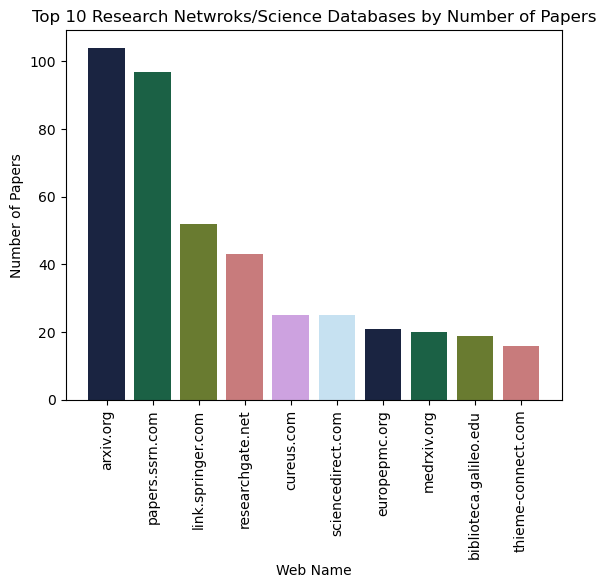

In [217]:
palette = sns.color_palette("cubehelix")
plt.bar(top_journals.index, top_journals.values, color = palette)
plt.xticks(rotation=90)
plt.xlabel('Web Name')
plt.ylabel('Number of Papers')
plt.title('Top 10 Research Netwroks/Science Databases by Number of Papers')
plt.show()


## 🌡️ Sentiment Analysis

In [219]:
from textblob import TextBlob

def get_sentiment_counts(cleaned_titles):
    pos_count = 0
    neg_count = 0
    neu_count = 0
    
    for title_tokens in cleaned_titles:
        title = ' '.join(title_tokens)  # Join the list of tokens into a string
        blob = TextBlob(title)
        sentiment = blob.sentiment.polarity
        
        if sentiment > 0:
            pos_count += 1
        elif sentiment < 0:
            neg_count += 1
        else:
            neu_count += 1
    
    return pos_count, neg_count, neu_count

pos_count, neg_count, neu_count = get_sentiment_counts(cleaned_titles)
print(f"Positive titles: {pos_count}")
print(f"Neutral titles: {neu_count}")
print(f"Negative titles: {neg_count}")


Positive titles: 173
Neutral titles: 525
Negative titles: 123


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Sentiment Distribution of Paper Titles')

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Number of Titles')

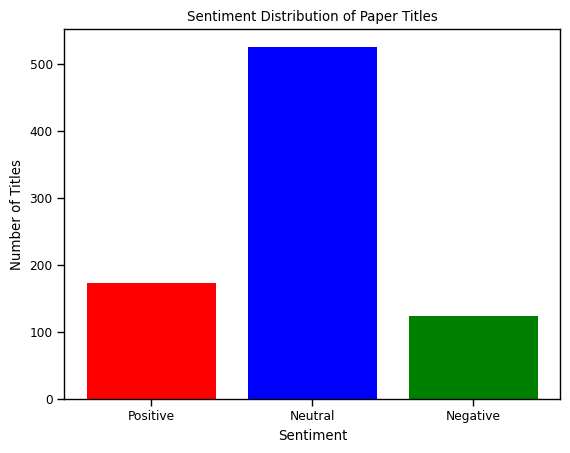

In [240]:
# Create bar chart

plt.bar(['Positive', 'Neutral', 'Negative'], [pos_count, neu_count, neg_count],color=['r','b','g'])
plt.title('Sentiment Distribution of Paper Titles')
plt.xlabel('Sentiment')
plt.ylabel('Number of Titles')

# Set background color to white
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)

# Show chart
plt.show()
